In [1]:
import pandas as pd

df = pd.read_csv('./data/Training_Data_0611N_cleaned.csv').drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(19599, 50)


,cust_id,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,...,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt
0,550391.0,0.0,1.0,74.0,1.0,0.0,1518.0,122.0,811.0,96.0,...,0.0,NaN,1.0,0.034044,0.0000,991.0,NaN,0.0,NaN,3.0
1,550392.0,0.0,1.0,64.0,0.0,0.0,4807.0,354.0,1052.0,82.0,...,0.0,7.0,1.0,0.044086,0.0877,2.0,24.0,2.0,NaN,0.0
2,550393.0,0.0,1.0,75.0,1.0,0.0,2361.0,204.0,1351.0,118.0,...,0.0,NaN,1.0,0.039613,0.0000,4828.0,NaN,0.0,387.0,3.0
3,550394.0,0.0,2.0,73.0,0.0,1.0,5452.0,142.0,1195.0,50.0,...,1.0,493.0,1.0,0.001200,0.0000,4598.0,NaN,0.0,295.0,4.0
4,550395.0,0.0,2.0,68.0,0.0,0.0,170.0,34.0,88.0,20.0,...,0.0,NaN,2.0,0.003378,0.0168,2176.0,2606.0,5.0,143.0,13.0


In [2]:
df.dropna(subset=['cust_id'], inplace=True)
df.isna().sum()

cust_id                               0
profitable_flag                       0
count_accts                           0
cm_age                                0
flag_top_ed_spender                  48
flag_cust_fee_paid_6m                 0
pre6m_cust_spend                    590
pre6m_cust_roc_cnt                    0
pre6m_cust_non_disc_amt            1182
pre6m_cust_non_disc_cnt               0
pre6m_cust_disc_amt                 693
pre6m_cust_disc_cnt                   0
pre6m_cust_outbound_amt            2177
pre6m_cust_online_amt              1211
pre6m_cust_online_cnt                 0
pre6m_cust_travel_amt              1921
pre6m_cust_travel_cnt                 0
pre6m_cust_retail_amt               834
pre6m_cust_retail_cnt                 0
pre6m_cust_myca_active                0
pre6m_cust_mob_logins                 0
pre6m_total_mc_trs                    0
acq_sub_chn                         902
acq_type_grp                        872
fee_type_grp                          0


In [3]:
print(df.shape)
print(df.dropna().shape)

(19595, 50)
(218, 50)


### Drop some highly null columns

In [4]:
high_null = ['cnsumr_chrg_avg_credit_12m_amt', 'sow_tot_annual_ext_pmt_amt', 'sow_tot_revol_bal_amt', 
             'sow_tot_trans_bal_amt']
df_wo_nulls = df.drop(high_null, axis=1)
print(df_wo_nulls.shape)
print(df_wo_nulls.dropna().shape)

(19595, 46)
(13596, 46)


In [5]:
df_wo_nulls.isna().sum()

cust_id                              0
profitable_flag                      0
count_accts                          0
cm_age                               0
flag_top_ed_spender                 48
flag_cust_fee_paid_6m                0
pre6m_cust_spend                   590
pre6m_cust_roc_cnt                   0
pre6m_cust_non_disc_amt           1182
pre6m_cust_non_disc_cnt              0
pre6m_cust_disc_amt                693
pre6m_cust_disc_cnt                  0
pre6m_cust_outbound_amt           2177
pre6m_cust_online_amt             1211
pre6m_cust_online_cnt                0
pre6m_cust_travel_amt             1921
pre6m_cust_travel_cnt                0
pre6m_cust_retail_amt              834
pre6m_cust_retail_cnt                0
pre6m_cust_myca_active               0
pre6m_cust_mob_logins                0
pre6m_total_mc_trs                   0
acq_sub_chn                        902
acq_type_grp                       872
fee_type_grp                         0
Cust_tenure              

In [6]:
df['profitable_flag'] = df['profitable_flag'].astype(int)
df['profitable_flag'].value_counts()

0    15951
1     3644
Name: profitable_flag, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
categorical_features_ = ['acq_sub_chn', 'acq_type_grp', 'fee_type_grp']

In [9]:
#Let's just exclude for now
final_df = df_wo_nulls.drop(categorical_features_, axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('profitable_flag', axis=1), 
                                                    final_df['profitable_flag'], test_size=0.2)

In [11]:
X_train

,cust_id,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,...,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_revol_cnt,sow_tot_trans_cnt
2762,553153.0,1.0,49.0,0.0,0.0,2931.0,300.0,420.0,60.0,2511.0,...,0.000,934.0,934.0,964.0,0.0,1.0,0.097453,0.000,0.0,2.0
8619,559010.0,1.0,35.0,0.0,0.0,374.0,40.0,118.0,4.0,256.0,...,0.000,779.0,779.0,1190.0,1.0,0.0,0.000000,0.000,0.0,0.0
8021,558412.0,1.0,31.0,1.0,0.0,1241.0,148.0,58.0,44.0,1182.0,...,0.032,328.0,307.0,1350.0,0.0,1.0,0.574676,0.000,0.0,0.0
19462,569853.0,1.0,43.0,0.0,1.0,8273.0,380.0,4617.0,164.0,3657.0,...,0.000,2572.0,2325.0,1106.0,0.0,1.0,0.486564,0.000,0.0,2.0
2516,552907.0,1.0,34.0,1.0,0.0,2444.0,720.0,1960.0,578.0,484.0,...,0.000,471.0,471.0,1342.0,0.0,1.0,0.018413,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,552456.0,1.0,41.0,0.0,0.0,921.0,48.0,74.0,10.0,847.0,...,0.001,NaN,NaN,965.0,0.0,1.0,0.002320,0.000,0.0,0.0
5960,556351.0,1.0,26.0,0.0,0.0,1129.0,146.0,584.0,58.0,545.0,...,0.002,1057.0,768.0,1129.0,1.0,0.0,0.000000,0.000,0.0,0.0
8006,558397.0,1.0,32.0,1.0,0.0,2757.0,262.0,330.0,124.0,2428.0,...,0.000,395.0,395.0,1296.0,0.0,1.0,0.044760,0.000,0.0,0.0
6626,557017.0,1.0,30.0,0.0,0.0,1715.0,184.0,348.0,40.0,1367.0,...,0.001,229.0,229.0,807.0,0.0,1.0,0.360066,0.000,0.0,0.0


In [12]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)

In [13]:
param = {'num_leaves':500, 'objective':'binary','max_depth':10,'learning_rate':.005,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

In [ ]:
lgbm=lgb.train(param,train_data,)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2873, number of negative: 12803
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.171612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4976
[LightGBM] [Info] Number of data points in the train set: 15676, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183274 -> initscore=-1.494323
[LightGBM] [Info] Start training from score -1.494323


KeyboardInterrupt: 

No further splits with positive gain, best gain: -inf


KeyboardInterrupt: 

No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [196]:
y_pred=lgbm.predict(X_test)

(array([ 71., 115., 222., 289., 440., 451., 342., 363., 292., 264., 213.,
        194., 120., 101.,  69.,  73.,  54.,  46.,  44.,  32.,  23.,  22.,
         13.,  10.,  10.,   4.,   1.,   5.,  10.,   4.,   4.,   0.,   2.,
          4.,   2.,   3.,   2.,   1.,   2.,   2.]),
 array([0.14542298, 0.15051362, 0.15560427, 0.16069492, 0.16578557,
        0.17087622, 0.17596686, 0.18105751, 0.18614816, 0.19123881,
        0.19632946, 0.20142011, 0.20651075, 0.2116014 , 0.21669205,
        0.2217827 , 0.22687335, 0.23196399, 0.23705464, 0.24214529,
        0.24723594, 0.25232659, 0.25741723, 0.26250788, 0.26759853,
        0.27268918, 0.27777983, 0.28287048, 0.28796112, 0.29305177,
        0.29814242, 0.30323307, 0.30832372, 0.31341436, 0.31850501,
        0.32359566, 0.32868631, 0.33377696, 0.3388676 , 0.34395825,
        0.3490489 ]),
 <a list of 40 Patch objects>)

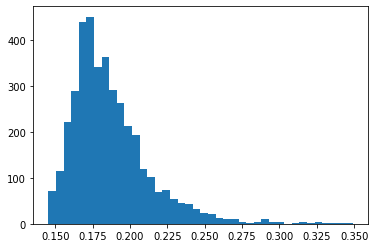

In [207]:
import matplotlib.pyplot as plt
plt.hist(y_pred, bins=40)

In [208]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
y_pred_binary = (y_pred>0.5).astype(int)
accuracy = accuracy_score(y_pred_binary,y_test)
f1 = f1_score(y_pred_binary,y_test)
auc = roc_auc_score(y_pred_binary,y_test)
print("Accuracy: %f, F1 Score: %f, AUC: %s", accuracy, f1, auc) 

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.